$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE - Fall 2025}\\\\
\textit{Center for Data Science, New York University} \\\\
\textit{November 14, 2025}\\\\\
\text{ Prepared by: Vivek Kumar Agarwal}\\\\
\textbf{Recitation 11: Regression Discontinuity}\\\\
\end{array}
$$


![Causal Inference](../figures/CI_lab10_image1.png)

---

## Today's Recitation 

- Collider Bias (from last week) 
- Regression Discontinuity
- Lets Code!!

---

## Collider Bias

In our Sesame Street study, we found that encouraging kids to watch the show improved their test scores. But controlling for more variables can sometimes **hurt** rather than help due to **collider bias**.

### Example: Success Stories

Imagine the school district wants to feature kids in a "success story" campaign. They select kids who either:
- Watched a lot of Sesame Street (the intervention worked!), OR
- Scored really well on tests (regardless of watching)

Now here's the problem: if we **only look at kids in the success stories**, we might see a *negative* relationship between watching Sesame Street and test scores. Why? Among featured kids, those who didn't watch much Sesame Street must have gotten in because of high test scores, while those with lower scores must have watched a lot to be featured.

This spurious negative relationship is **collider bias** - it appears when we condition on a variable that is caused by two other variables.


---

### The Structure

**Collider bias** occurs when:
1. Two variables (X and Y) both influence a third variable Z (the "collider")
2. We condition on Z (e.g., only look at cases where Z is present, or add Z as a control)
3. This creates an artificial association between X and Y, even if they're independent

In our example:
- **X** = Sesame Street watching hours
- **Y** = Test scores  
- **Z** = Being featured (the collider) - caused by both X and Y

When we condition on Z (only analyze featured kids), we induce a spurious negative correlation between X and Y.

![Indep](https://catalogofbias.org/wp-content/uploads/sites/2/2019/03/Collider-bias_fig-1-e1551439537528.png)

### The Correct Approach

**Don't control for colliders!** Only control for variables that are **confounders** (common causes of treatment and outcome). In our original Sesame Street analysis, we controlled for parental education and household income because they affect *both* Sesame Street viewing *and* test scores. But we should never control for variables that are *consequences* of our treatment and outcome.

---

---

## Today's Topic 

## Regression Discontinuity Design

---

## Why Regression Discontinuity?

So far, we've learned several approaches to causal inference:
- **Randomized experiments**: The gold standard, but often impractical or unethical
- **Controlling for confounders**: Requires observing *all* relevant confounders - a strong assumption
- **Natural experiments & IV**: Requires finding valid instruments, which can be rare

But what if we're in a situation where:
- We can't randomize treatment (ethical or practical constraints)
- We worry about unobserved confounders
- BUT treatment is assigned based on a **clear rule** with a cutoff?

This is where **Regression Discontinuity Design (RDD)** comes in. It exploits situations where treatment jumps discontinuously at a threshold, even though everything else varies smoothly.


---

## The Intuition: Nature is Continuous

Most things in nature are continuous. If we see spikes or jumps, they are very likely to be **artificial** - created by rules, policies, or human decisions. How can we leverage this phenomenon to derive valid causal estimates?

The key insight: if the **only** thing that jumps at a threshold is the treatment, then that jump in outcomes must be caused by the treatment!


---

## The Setup

In Regression Discontinuity, treatment assignment is determined by a **running variable** $R$ and a **cutoff** $c$. Treatment status $S$ is assigned as:

$$
S =
\begin{cases}
1 & \text{if } R \geq c \\
0 & \text{if } R < c
\end{cases}
$$

For example:
- Students with SAT ≥ 1200 receive a scholarship ($S=1$), others don't ($S=0$)
- Employees with performance score ≥ 80 get promoted, others don't
- Regions with poverty rate > 25% qualify for federal aid, others don't

## The Core Intuition

The key insight is that individuals **just around the cutoff** $c$ should be essentially identical - their position on either side of the cutoff is determined by random chance rather than systematic differences.

For example, there is no meaningful reason why someone scored 1199 on the SAT versus 1201 - it could be luck on a single question, or how they felt that morning. These students are fundamentally similar in ability, yet one receives the scholarship and one doesn't.

Therefore, by comparing outcomes just above and below the cutoff, we can estimate a **local causal effect** - the effect of treatment for individuals near the threshold. Similar to LATE from instrumental variables, the causal estimate from RDD applies to the subgroup around the cutoff, not necessarily the general population.

<img src="https://github.com/dapivei/causal-infere/blob/main/images/rdd.png?raw=true" width="600"/>

The discontinuous jump in the outcome at the cutoff is our causal effect - if everything varies smoothly except for the treatment assignment, then the jump must be due to the treatment!

---

## Major Assumption: Smoothness at the Cutoff

The key assumption for RDD to work is that **potential outcomes vary smoothly** with the running variable $R$ at the cutoff $c$. 

What does this mean? Imagine potential outcomes as smooth curves - if there were no treatment, outcomes would change gradually as $R$ increases. The only reason we see a jump at $c$ is because treatment suddenly "turns on" there.

Mathematically, we need:
$$
\begin{align*}
\mathbb{E}[Y | R = c] &= \mathbb{E}[Y(S = 1, U) | R = c] \quad & (r \geq c \Rightarrow S = 1)
\end{align*}
$$
*At the cutoff, everyone gets treated, so the observed outcome equals the treated potential outcome.*

$$
\begin{align*}
\lim_{r \uparrow c} \mathbb{E}[Y | R = r] &= \lim_{r \uparrow c} \mathbb{E}[Y(S = 0, U) | R = r] \quad & (r < c \Rightarrow S = 0)
\end{align*}
$$
*Just below the cutoff, everyone is in control, so the observed outcome equals the control potential outcome.*

$$
\begin{align*}
    &= \mathbb{E}[Y(S = 0, U) | R = c] \quad & (\text{smoothness})
\end{align*}
$$
*By the smoothness assumption, as we approach the cutoff from below, the control potential outcome converges to what it would be exactly at the cutoff.*

In words: The treatment effect at the cutoff is the difference between these two limits - the jump we observe when crossing from control to treatment.

---

### The Bandwidth Parameter

In practice, we can't observe outcomes exactly at $R = c$ with enough precision. We need to use observations **near** the cutoff - this defines our **bandwidth** $b$.

We only use observations where $R \in (c-b, c+b)$ - close enough to the cutoff that individuals are similar.

**Bias-Variance Tradeoff**:
- **Larger bandwidth**: More data → lower variance, but observations further from cutoff → higher bias
- **Smaller bandwidth**: Less data → higher variance, but observations closer to cutoff → lower bias

**Example**: Students scoring 1199 vs 1200 are nearly identical. Students scoring 1100 vs 1200? 
- The bandwidth controls how far we're willing to go from the cutoff while still claiming "these students are basically the same."


A common practice is to try multiple bandwidths and check if results are robust.


---

## Estimating the Effect: Local Linear Regression

Now that we understand we need to use observations near the cutoff, how do we actually estimate the treatment effect?

**The goal**: Compare the outcome just above the cutoff (treated) to just below the cutoff (control). But outcomes might naturally trend upward or downward with $R$ - we need to account for this!

**The solution**: Fit separate linear trends on each side of the cutoff, then measure the jump between them at $c$.

We use this regression model on observations within bandwidth $b$:

$$
Y = \alpha_0 + \alpha_1 S + \alpha_2 (R - c) + \alpha_3 S \cdot (R - c) + \epsilon
$$

Let's understand each term and WHY it's there:

**$\alpha_0$**: The baseline - expected outcome for the control group exactly at the cutoff ($R = c$, $S = 0$).
- When $R = c$, we have $(R-c) = 0$, so the control group's outcome is just $\alpha_0$

**$\alpha_1$**: **The treatment effect at the cutoff** - this is what we're after!
- At $R = c$, the treated group's outcome is $\alpha_0 + \alpha_1$
- So $\alpha_1$ is literally the jump from control to treatment at the cutoff

**$\alpha_2 (R-c)$**: The slope for the control group - how outcomes change with $R$.
- This accounts for the fact that students with higher SAT scores might naturally have higher GPAs, even without the scholarship
- We center at $c$ (use $R-c$) so that when $R=c$, this term vanishes and we measure the intercept right at the cutoff

**$\alpha_3 S \cdot (R-c)$**: Allows the treated group to have a *different* slope.
- Maybe the scholarship helps high-ability students more (or less) than it helps those right at the cutoff
- This interaction term lets the two groups have different trends

**Why centering matters**: By using $(R - c)$ instead of just $R$, when we plug in $R = c$, all the slope terms disappear, and we're left with:
- Control: $Y = \alpha_0$
- Treated: $Y = \alpha_0 + \alpha_1$
- Difference: $\alpha_1$ ← This is our causal effect!

Under the smoothness assumption and with a "small enough" bandwidth, $\alpha_1$ identifies the causal effect:
$$
\alpha_1 = \mathbb{E}[Y(S = 1, U) -  Y(S = 0, U)| R = c]
$$

This is the **Local Average Treatment Effect (LATE)** at the cutoff - the causal effect for individuals right at the threshold.

---

## Example: The Incumbency Advantage

Do politicians who barely win an election have an advantage in the next election simply because they're now the "incumbent"? This is hard to study because strong candidates tend to win - but what about elections that are nearly tied?

**The RDD Setup**:
- **Running variable**: Vote share in election at time $t$ (the "current" election)
- **Cutoff**: 50% vote share - winners vs. losers
- **Treatment**: Winning the election (becoming incumbent)
- **Outcome**: Vote share in the next election at time $t+1$

**The key insight**: A candidate who wins with 50.1% vs one who loses with 49.9% should be essentially identical in quality, campaigning ability, and voter appeal. The tiny difference is basically random. But one becomes the incumbent with all its advantages (name recognition, fundraising, media attention), and the other doesn't!

Let's analyze real data from U.S. House elections:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the data
df = pd.read_csv("../data/lee_data.csv")

# Calculate vote share for each candidate
df["voteshare"] = df["origvote"] / df["totvote"]

# Identify winners (highest vote in each district-year)
df["winner"] = (df["origvote"] == df["highestvote"]).astype(int)

# For Democrats (party == 100), calculate their margin of victory
# Positive means Democrat won, negative means Republican won
df_dems = df[df["party"] == 100].copy()

# Calculate Democratic vote margin (centered at 0.5)
# This is the vote share relative to 50%
df_dems["dem_margin"] = df_dems["voteshare"] - 0.5

# Get next election results
# Sort by district and year
df_dems = df_dems.sort_values(['distid', 'yearel'])

# Create next election vote share (shift within each district)
df_dems['voteshare_next'] = df_dems.groupby('distid')['voteshare'].shift(-1)
df_dems['dem_margin_next'] = df_dems.groupby('distid')['dem_margin'].shift(-1)

# Keep only observations where we have next election data
df_rdd = df_dems.dropna(subset=['voteshare_next']).copy()

print(f"Total observations: {len(df_rdd)}")
print(f"\nDemocrat won (margin > 0): {(df_rdd['dem_margin'] > 0).sum()}")
print(f"Democrat lost (margin < 0): {(df_rdd['dem_margin'] < 0).sum()}")
print(f"\nSummary of Democratic vote margin:")
print(df_rdd['dem_margin'].describe())

Total observations: 9827

Democrat won (margin > 0): 5651
Democrat lost (margin < 0): 4175

Summary of Democratic vote margin:
count    9827.000000
mean        0.071689
std         0.212112
min        -0.499863
25%        -0.092313
50%         0.041683
75%         0.198536
max         0.500000
Name: dem_margin, dtype: float64


**What we did above ?**
1. Load the election data 
2. Calculates each candidate's vote share (their votes / total votes)
3. Focus on one candidate (party code 100)
4. Creates `dem_margin`: the key running variable. If a Democrat gets 52% of the vote, margin = 0.52 - 0.5 = 0.02 (won by 2 points). If they get 48%, margin = -0.02 (lost by 2 points)
5. Link each election to the next election in the same district
6. Keep only observations where we can observe the next election outcome

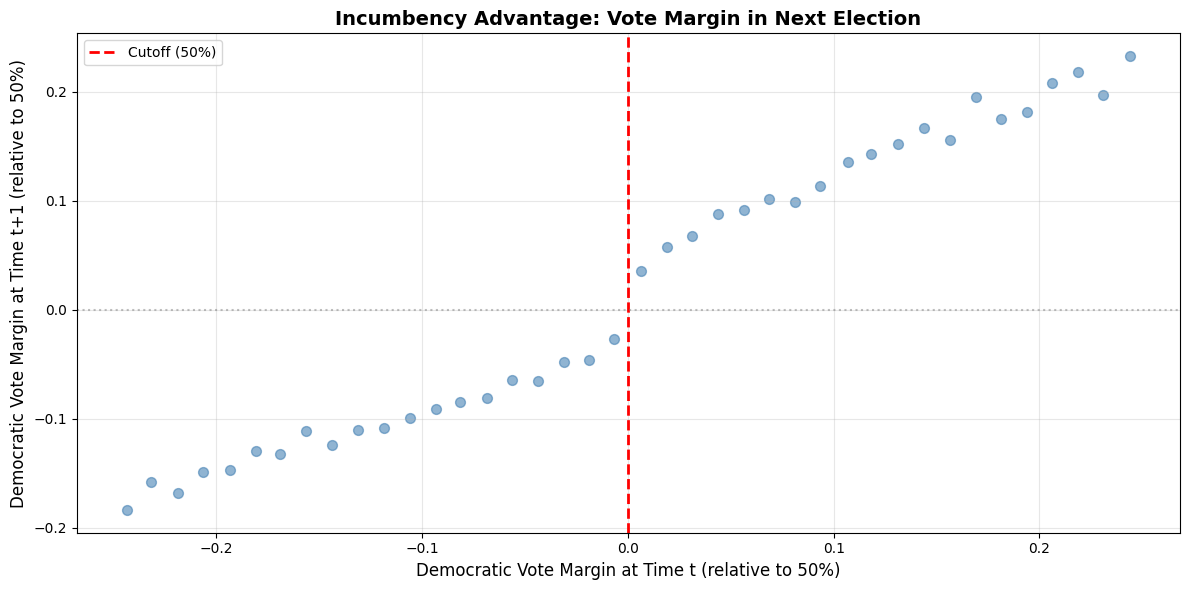

Notice the jump at 0? That's the incumbency advantage!


In [8]:
# Visualizing the Discontinuity
# Create bins for visualization
bins = np.linspace(-0.25, 0.25, 41)  # 40 bins from -25% to +25% margin
df_rdd['bin'] = pd.cut(df_rdd['dem_margin'], bins=bins, labels=False, include_lowest=True)

# Calculate average outcome in each bin
bin_means = df_rdd.groupby('bin').agg({
    'dem_margin': 'mean',
    'dem_margin_next': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(bin_means['dem_margin'], bin_means['dem_margin_next'], 
           alpha=0.6, s=50, color='steelblue')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff (50%)')
plt.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
plt.xlabel('Democratic Vote Margin at Time t (relative to 50%)', fontsize=12)
plt.ylabel('Democratic Vote Margin at Time t+1 (relative to 50%)', fontsize=12)
plt.title('Incumbency Advantage: Vote Margin in Next Election', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Notice the jump at 0? That's the incumbency advantage!")

**What we did in the code above?**
1. Grouped observations into 40 bins based on their vote margin in the current election
2. Calculated the average vote margin in the *next* election for each bin
3. Plot these averages to show the relationship

**What to look for in the plot**:
- **X-axis**: Current election margin (negative = Democrat lost, positive = Democrat won)
- **Y-axis**: Next election margin (same interpretation)
- **The red line at 0**: This is the cutoff - the boundary between winning and losing
- **Look for a jump**: If there's incumbency advantage, we should see the points "jump up" right after crossing the red line

**Interpretation**: If barely winning gives an advantage, the points just to the right of 0 should be higher than the smooth trend from the left side would predict. This vertical gap is the treatment effect!


In [9]:
def estimate_rdd(data, outcome, running_var, cutoff, bandwidth):
    """
    Estimate RDD effect using local linear regression
    """
    # Select observations within bandwidth
    subset = data[np.abs(data[running_var] - cutoff) <= bandwidth].copy()
    
    # Create centered running variable and treatment indicator
    subset['R_centered'] = subset[running_var] - cutoff
    subset['treated'] = (subset[running_var] >= cutoff).astype(int)
    subset['interaction'] = subset['treated'] * subset['R_centered']
    
    # Run regression: Y = α0 + α1*Treatment + α2*(R-c) + α3*Treatment*(R-c)
    X = subset[['treated', 'R_centered', 'interaction']]
    X = sm.add_constant(X)
    y = subset[outcome].dropna()
    X = X.loc[y.index]  # Match indices
    
    model = sm.OLS(y, X).fit()
    
    # Treatment effect is the coefficient on 'treated'
    effect = model.params['treated']
    se = model.bse['treated']
    ci_lower = effect - 1.96 * se
    ci_upper = effect + 1.96 * se
    
    return {
        'effect': effect,
        'se': se,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'n_obs': len(subset),
        'model': model
    }

# Try different bandwidths
bandwidths = [0.05, 0.10, 0.15, 0.20, 0.25]

print("\nRDD Estimates with Different Bandwidths")
print("=" * 70)
print(f"{'Bandwidth':<12} {'Effect':<12} {'Std Error':<12} {'95% CI':<25} {'N':<8}")
print("-" * 70)

for bw in bandwidths:
    result = estimate_rdd(df_rdd, 'dem_margin_next', 'dem_margin', cutoff=0, bandwidth=bw)
    
    print(f"{bw:<12.2f} {result['effect']:<12.4f} {result['se']:<12.4f} "
          f"[{result['ci_lower']:.4f}, {result['ci_upper']:.4f}]   {result['n_obs']:<8}")

print("=" * 70)


RDD Estimates with Different Bandwidths
Bandwidth    Effect       Std Error    95% CI                    N       
----------------------------------------------------------------------
0.05         0.0512       0.0096       [0.0324, 0.0700]   1803    
0.10         0.0685       0.0067       [0.0554, 0.0816]   3547    
0.15         0.0696       0.0057       [0.0584, 0.0808]   5247    
0.20         0.0782       0.0052       [0.0679, 0.0885]   6655    
0.25         0.0801       0.0048       [0.0706, 0.0896]   7752    


**How to interpret this table**:
- **Bandwidth**: How far from the cutoff we include observations
- **Effect**: The estimated incumbency advantage (in margin terms)
  - Example: 0.0782 means winning gives you a 7.82 percentage point advantage in the next election
- **Std Error**: Uncertainty in our estimate
- **95% CI**: We're 95% confident the true effect is in this range
- **N**: Number of observations used in the estimation

**Key insights**:
1. **Smaller bandwidth** = fewer observations but more "apples-to-apples" comparison → larger standard error but less bias
2. **Larger bandwidth** = more observations but includes less similar elections → smaller standard error but potential bias
3. **Robustness check**: If all bandwidths give similar effects, we're more confident in the result!

**Real-world interpretation**:
If the effect is around 0.078 (7.8 percentage points), it means:
- A Democrat who barely wins with 50.1% of the vote
- Will get approximately 57.8% in the next election (on average)
- While a Democrat who barely lost with 49.9%
- Will get approximately 42.1% in the next election (on average)

This 15-point swing (7.8 points above and below 50%) is the **incumbency advantage** - simply having won the previous election gives you a massive boost!


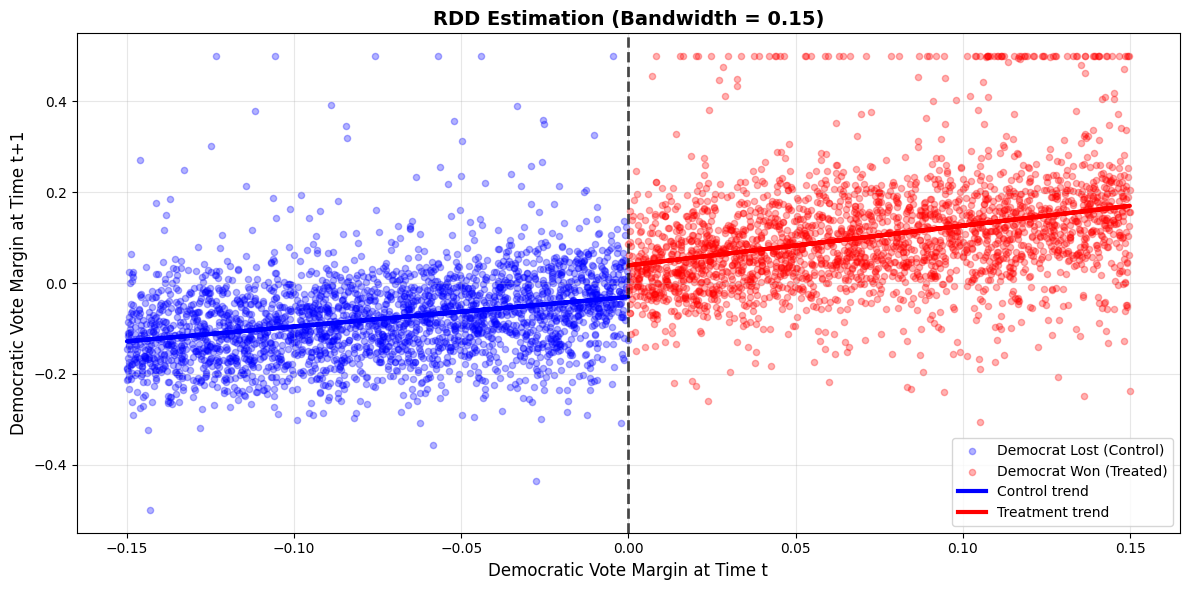


Estimated incumbency advantage: 0.0696
Interpretation: Barely winning an election increases your vote margin
in the NEXT election by about 6.96 percentage points!


In [10]:
# Use bandwidth = 0.15 for visualization
bw = 0.15
subset = df_rdd[np.abs(df_rdd['dem_margin']) <= bw].copy()
subset['R_centered'] = subset['dem_margin']

# Fit separate lines for each side
left_side = subset[subset['dem_margin'] < 0]  # Democrat lost
right_side = subset[subset['dem_margin'] >= 0]  # Democrat won

# Fit linear models for each side
if len(left_side) > 0:
    X_left = sm.add_constant(left_side['R_centered'])
    model_left = sm.OLS(left_side['dem_margin_next'], X_left).fit()
    left_pred = model_left.predict(X_left)

if len(right_side) > 0:
    X_right = sm.add_constant(right_side['R_centered'])
    model_right = sm.OLS(right_side['dem_margin_next'], X_right).fit()
    right_pred = model_right.predict(X_right)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(left_side['dem_margin'], left_side['dem_margin_next'], 
           alpha=0.3, s=20, color='blue', label='Democrat Lost (Control)')
plt.scatter(right_side['dem_margin'], right_side['dem_margin_next'], 
           alpha=0.3, s=20, color='red', label='Democrat Won (Treated)')

# Plot fitted lines
plt.plot(left_side['dem_margin'], left_pred, color='blue', linewidth=3, label='Control trend')
plt.plot(right_side['dem_margin'], right_pred, color='red', linewidth=3, label='Treatment trend')

plt.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.7)
plt.xlabel('Democratic Vote Margin at Time t', fontsize=12)
plt.ylabel('Democratic Vote Margin at Time t+1', fontsize=12)
plt.title(f'RDD Estimation (Bandwidth = {bw})', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate the jump at cutoff
jump_at_cutoff = model_right.params['const'] - model_left.params['const']
print(f"\nEstimated incumbency advantage: {jump_at_cutoff:.4f}")
print(f"Interpretation: Barely winning an election increases your vote margin")
print(f"in the NEXT election by about {jump_at_cutoff*100:.2f} percentage points!")

**What we did in the code above**:
1. Selected observations within bandwidth = 0.15 (±15 percentage points)
2. Fitted two separate linear regression lines:
   - **Blue line**: Trend for Democrats who lost (control group)
   - **Red line**: Trend for Democrats who won (treatment group)
3. The vertical distance between these lines at the cutoff (x=0) is the treatment effect

**What to look for in the plot**:
- **Blue dots**: Democrats who lost the current election
- **Red dots**: Democrats who won the current election
- **Gap between lines at x=0**: This is the incumbency advantage!
- The lines extrapolate what would happen at exactly 50% based on nearby elections

**Interpretation**:
The jump might show something like:
- If the effect is 0.078, the red line at x=0 is about 0.078 units higher than the blue line
- This means winning barely (instead of losing barely) gives you 7.8 extra percentage points in the next election
- This is a HUGE advantage just from being the incumbent!

### The Bottom Line

**Regression Discontinuity allowed us to estimate a causal effect without randomization!** By exploiting the discontinuous jump in treatment at the 50% vote threshold, and comparing nearly identical candidates on either side, we found strong evidence of incumbency advantage.

The key assumptions that made this work:
1. **Smoothness**: Everything else (candidate quality, district preferences, etc.) varies smoothly through the cutoff
2. **No manipulation**: Candidates can't precisely control whether they get 49.9% vs 50.1%
3. **Local effect**: This tells us about the effect for close elections, not landslides

---

## Validity Check: Testing Smoothness of Covariates

Remember our key assumption for RDD? The potential outcomes must be smooth around the cutoff:

$$
\begin{align}
\mathbb{E}_U[Y(S=1, U) \mid R=r] \\
\mathbb{E}_U[Y(S=0, U) \mid R=r]
\end{align}
$$

These should vary smoothly near the cutoff $c$.

But how do we test this assumption? We can't directly observe the potential outcomes! 

**The Solution**: Test if **pre-treatment characteristics** (covariates in $U$) are smooth around the cutoff.

### Why Does This Help?

If candidates just below and just above the 50% cutoff are truly similar (as RDD assumes), then their **observable characteristics** should also be similar. Things like:
- Prior political experience
- Age
- Education
- Campaign spending
- District characteristics

If we see a sudden jump in these variables at the cutoff, that's a red flag! It suggests:
- People might be manipulating the running variable to just cross the threshold
- Or there's something systematically different about winners vs. losers beyond just random chance

**Important caveat**: We have a multivariate variable $U$ with many components. Testing each component separately is not a perfect test (smoothness of components doesn't guarantee smoothness of the joint distribution), but it's a practical way to check for obvious violations.


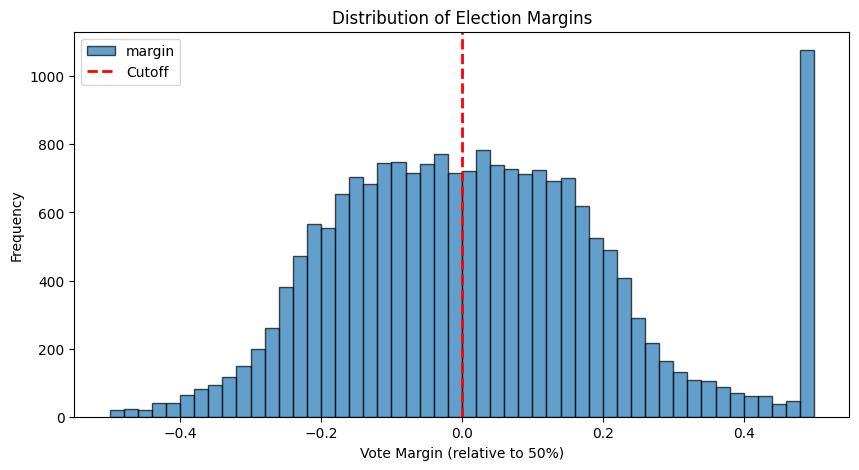

In [11]:
### Example: Testing Prior Office Experience

# Let's check if candidates' prior political experience (`officeexp`) jumps at the 50% cutoff.

# Calculate the margin of victory/defeat
df["margin"] = df["voteshare"] - 0.5

# First, let's see the distribution of margins
plt.figure(figsize=(10, 5))
df["margin"].plot(kind="hist", bins=50, alpha=0.7, edgecolor='black')
plt.xlabel("Vote Margin (relative to 50%)")
plt.ylabel("Frequency")
plt.title("Distribution of Election Margins")
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff')
plt.legend()
plt.show()

**What to look for**: The distribution should be relatively smooth around 0. If there's a big spike or gap right at 0, that suggests manipulation (candidates bunching just above 50%).

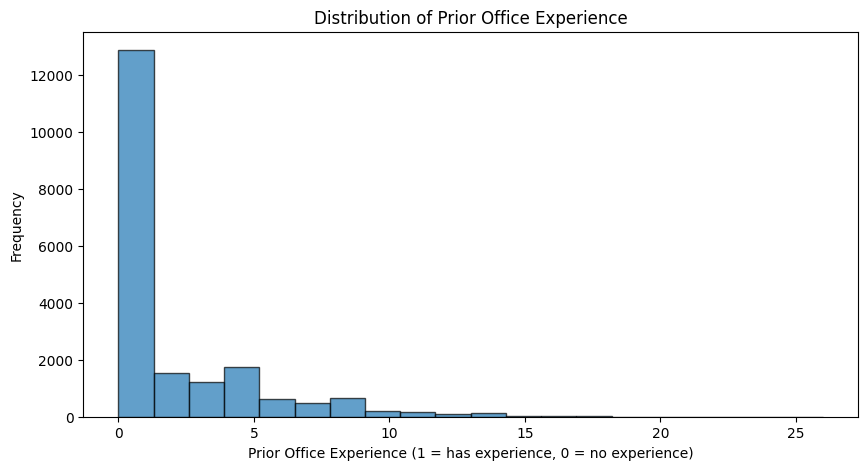

In [12]:
# Now look at the distribution of prior office experience
plt.figure(figsize=(10, 5))
df['officeexp'].plot(kind="hist", bins=20, alpha=0.7, edgecolor='black')
plt.xlabel("Prior Office Experience (1 = has experience, 0 = no experience)")
plt.ylabel("Frequency")
plt.title("Distribution of Prior Office Experience")
plt.show()

**This shows us the overall distribution. But the key question is: **Does experience jump at the cutoff?**

<Figure size 1000x600 with 0 Axes>

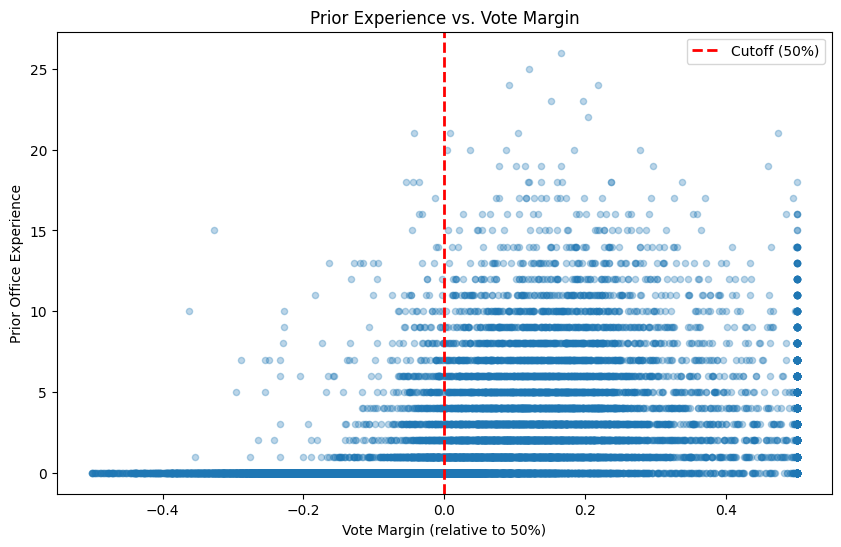

In [13]:
# Scatter plot: margin vs. experience
plt.figure(figsize=(10, 6))
df.plot(x="margin", y="officeexp", kind="scatter", alpha=0.3, s=20, figsize=(10, 6))
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff (50%)')
plt.xlabel("Vote Margin (relative to 50%)")
plt.ylabel("Prior Office Experience")
plt.title("Prior Experience vs. Vote Margin")
plt.legend()
plt.show()

**What this shows**: Raw data is noisy. Hard to see patterns with individual points.

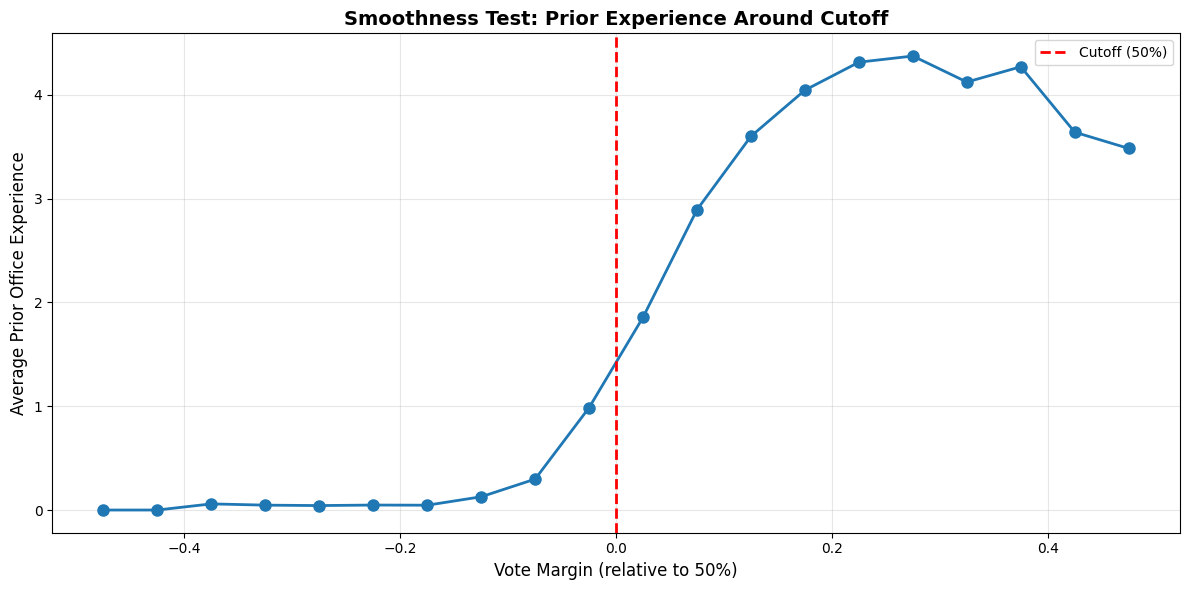

In [14]:
### Binned Smoothness Plot

#Let's create bins and plot the average experience in each bin - this makes patterns clearer:
# Create bins of size 0.05 (5 percentage points)
bin_size = 0.05
bin_centers = []
mean_experience = []

for i in np.arange(-0.5, 0.5, bin_size):
    # Select observations in this bin
    df_bin = df[df["margin"].between(i, i + bin_size)]
    
    # Calculate average experience in this bin
    if len(df_bin) > 0:  # Only if bin has observations
        bin_centers.append(i + bin_size/2)  # Center of the bin
        mean_experience.append(df_bin["officeexp"].mean())

# Plot
plt.figure(figsize=(12, 6))
plt.plot(bin_centers, mean_experience, marker="o", linewidth=2, markersize=8)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff (50%)')
plt.xlabel("Vote Margin (relative to 50%)", fontsize=12)
plt.ylabel("Average Prior Office Experience", fontsize=12)
plt.title("Smoothness Test: Prior Experience Around Cutoff", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**What we are looking above**:

 **GOOD (Valid RDD)**: The dots form a smooth curve with no sudden jump at the red line (x=0). This means candidates just below and just above 50% have similar prior experience.

 **BAD (Invalid RDD)**: There's a sudden jump at the red line. For example, if average experience jumps from 0.3 to 0.5 right at the cutoff, this suggests winners and losers are systematically different in ways beyond random chance.

### Interpretation

If prior office experience is smooth around the cutoff, it supports our RDD design because:
1. It suggests candidates on either side of 50% are comparable
2. The 50% threshold really does create a "quasi-random" assignment
3. The jump we see in **outcomes** (next election performance) is likely causal, not due to pre-existing differences

If it's NOT smooth (there's a jump), we have a problem:
- Maybe experienced politicians are better at just crossing 50%
- Or districts that elect experienced politicians are systematically different
- Either way, our "apples-to-apples" comparison is compromised


Created covariates:
- officeexp: Prior office experience (0 or 1)
- race_competitiveness: How close the race was
- turnout: Total votes cast in the district
- voteshare_lag: Candidate's vote share in previous election
- ran_before: Whether candidate ran before (0 or 1)


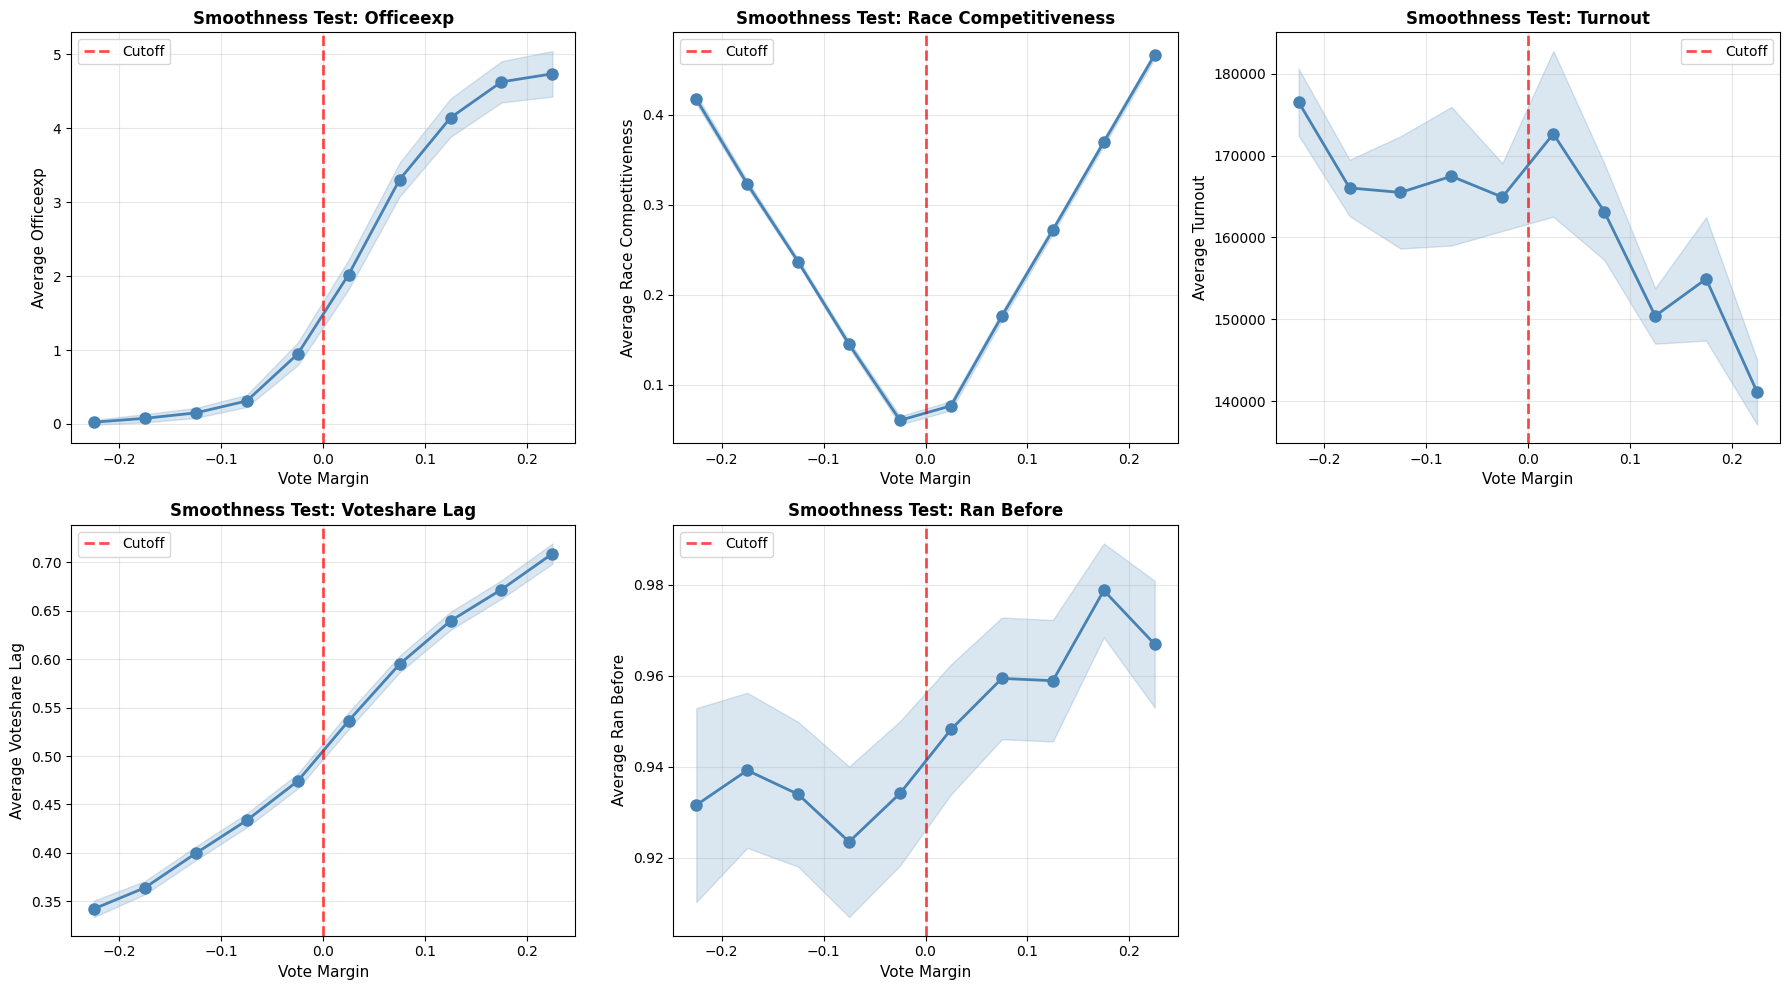


INTERPRETATION GUIDE:
 GOOD: Smooth line through the cutoff → Valid RDD assumption
 BAD: Jump/discontinuity at cutoff → Potential violation of RDD assumption

If covariates are smooth, it suggests:
- Candidates on either side of 50% are comparable
- Assignment near cutoff is 'as-if' random
- The treatment effect we estimate is likely causal


In [16]:
### Testing Multiple Covariates

# First, let's create some additional covariates to test
# These should be pre-treatment characteristics that shouldn't jump at the cutoff

# 1. Race competitiveness: How close was the race? (difference between top two candidates)
df['race_competitiveness'] = (df['highestvote'] - df['sechighestvote']) / df['totvote']

# 2. Total turnout in the district
df['turnout'] = df['totvote']

# 3. Get previous election's vote share for the same candidate (within district)
df = df.sort_values(['distid', 'yearel'])
df['voteshare_lag'] = df.groupby(['distid', 'party'])['voteshare'].shift(1)

# 4. Indicator for whether candidate ran before in this district
df['ran_before'] = df['voteshare_lag'].notna().astype(int)

print("Created covariates:")
print("- officeexp: Prior office experience (0 or 1)")
print("- race_competitiveness: How close the race was")
print("- turnout: Total votes cast in the district")
print("- voteshare_lag: Candidate's vote share in previous election")
print("- ran_before: Whether candidate ran before (0 or 1)")

# Now test all these covariates for smoothness
covariates_to_test = ['officeexp', 'race_competitiveness', 'turnout', 'voteshare_lag', 'ran_before']

# For Democrats only (as in our main analysis)
df_dems_smooth = df[df["party"] == 100].copy()
df_dems_smooth["margin"] = df_dems_smooth["voteshare"] - 0.5

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, covariate in enumerate(covariates_to_test):
    bin_centers = []
    mean_values = []
    std_errors = []
    
    for i in np.arange(-0.25, 0.25, 0.05):  # Focus on closer range
        df_bin = df_dems_smooth[df_dems_smooth["margin"].between(i, i + 0.05)]
        if len(df_bin) > 0 and df_bin[covariate].notna().sum() > 0:
            bin_centers.append(i + 0.025)
            mean_values.append(df_bin[covariate].mean())
            # Calculate standard error for error bars
            std_errors.append(df_bin[covariate].sem())
    
    # Plot
    axes[idx].plot(bin_centers, mean_values, marker="o", linewidth=2, markersize=8, color='steelblue')
    axes[idx].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Cutoff')
    axes[idx].fill_between(bin_centers, 
                           [m - 1.96*se for m, se in zip(mean_values, std_errors)],
                           [m + 1.96*se for m, se in zip(mean_values, std_errors)],
                           alpha=0.2, color='steelblue')
    axes[idx].set_xlabel("Vote Margin", fontsize=11)
    axes[idx].set_ylabel(f"Average {covariate.replace('_', ' ').title()}", fontsize=11)
    axes[idx].set_title(f"Smoothness Test: {covariate.replace('_', ' ').title()}", fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    axes[idx].legend()

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETATION GUIDE:")
print("="*70)
print(" GOOD: Smooth line through the cutoff → Valid RDD assumption")
print(" BAD: Jump/discontinuity at cutoff → Potential violation of RDD assumption")
print("\nIf covariates are smooth, it suggests:")
print("- Candidates on either side of 50% are comparable")
print("- Assignment near cutoff is 'as-if' random")
print("- The treatment effect we estimate is likely causal")

---

## Interpreting the Smoothness Test Results Above

These plots test whether pre-treatment characteristics "jump" at the 50% cutoff. Remember: if the RDD design is valid, **only the treatment** (winning) should jump at the cutoff, not the characteristics of candidates.

### Plot-by-Plot Analysis

**1. Officeexp (Top Left) -  PASSES**
- Shows prior political experience
- **Pattern**: Smooth upward trend through the cutoff
- **No jump at x=0**: The line passes through the red line smoothly
- **Interpretation**: Winners and losers just around 50% have similar levels of political experience
- **Conclusion**: GOOD - supports RDD validity

**2. Race Competitiveness (Top Middle) -  PASSES (with caveat)**
- Measures how close the race was (margin between 1st and 2nd place)
- **Pattern**: V-shape with minimum at the cutoff
- **Why the V-shape?** This actually makes sense! Races decided at exactly 50-50 are by definition the LEAST competitive (closest/tightest races have the smallest margin)
- **Key observation**: The pattern is **symmetric and smooth** - no discontinuous jump
- **Conclusion**: GOOD - the shape is expected, and there's no discontinuity

**3. Turnout (Top Right) -  PASSES**
- Shows total voter turnout in the district
- **Pattern**: Relatively flat with some noise, slight downward trend
- **No jump at x=0**: The transition through the cutoff is smooth
- **Interpretation**: Districts where Democrats barely win vs barely lose have similar voter turnout
- **Conclusion**: GOOD - no evidence that turnout systematically differs at the threshold

**4. Voteshare Lag (Bottom Left) -  PASSES**
- Shows the candidate's vote share in the PREVIOUS election
- **Pattern**: Smooth upward trend through the cutoff
- **No jump at x=0**: Continuous line through the red line
- **Interpretation**: Candidates who barely won vs barely lost performed similarly in their previous races
- **Conclusion**: GOOD - past performance doesn't jump at the cutoff

**5. Ran Before (Bottom Right) -  PASSES**  
- Indicator of whether candidate ran in this district before
- **Pattern**: Relatively flat and noisy, but no clear jump
- **Wide confidence bands**: Lots of uncertainty, but centered around similar values on both sides
- **Interpretation**: Repeat candidates vs newcomers are distributed similarly around the cutoff
- **Conclusion**: GOOD - no systematic difference in whether candidates are repeats

### Overall Verdict:  RDD ASSUMPTIONS SUPPORTED

**What we're looking for**: A discontinuous JUMP at the red line (x = 0) would look like:
- Line suddenly shifts up or down at the cutoff
- Different levels on the left vs right side

**What we see**: All covariates show smooth patterns through the cutoff. Even when there are trends (like the V-shape for competitiveness), they're **continuous** - no sudden jumps.

**Why this matters**:
1. **Supports "as-if random" assignment**: Candidates just below and above 50% are similar in observable characteristics
2. **Reduces concern about manipulation**: If candidates could precisely control their vote share, we'd see discontinuities in their characteristics
3. **Strengthens causal interpretation**: The jump we saw in the OUTCOME (next election performance) is likely due to the TREATMENT (winning), not pre-existing differences

### What Would Be Concerning?

 **BAD example**: If "officeexp" jumped from 0.1 (left of cutoff) to 0.5 (right of cutoff), that would mean:
- Winners are systematically more experienced than losers, even at the margin
- The 50% threshold isn't creating comparable groups
- Our RDD estimates would be biased

But we DON'T see this! All our covariates pass the smoothness test. 

### The Bottom Line

These smoothness tests give us **confidence that the RDD design is valid**. The fact that pre-treatment characteristics don't jump at the cutoff suggests that:
- The assignment mechanism (winning vs losing at 50%) is creating comparable groups near the threshold
- The large incumbency effect we estimated (~7-8 percentage points) is likely a true causal effect
- Our fundamental RDD assumption is empirically supported

---

## Additional Resources and References

+ Some useful resources (Please have a look at the online book as a reference for today's recitation, link given below)

**Books and Online Resources:**
- *Causal Inference for The Brave and True*. Chapter 16: Regression Discontinuity Design. [Link](https://matheusfacure.github.io/python-causality-handbook/16-Regression-Discontinuity-Design.html)

**Original Papers:**
- Lee, D. S. (2008). Randomized experiments from non-random selection in U.S. House elections. *Journal of Econometrics*, 142(2), 675-697.
- Imbens, G. W., & Lemieux, T. (2008). Regression discontinuity designs: A guide to practice. *Journal of Econometrics*, 142(2), 615-635.

## Next Recitation 

+ We explore RDD in more detail with more examples


---